Alyshondria Hicks

MSBD566

Su 09/14/25

I did this with my own knowledge and no one else helped.

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how cleanor polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air. The AQI is reported according to the Environmental Protection Agency's scale. The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen forecast is currently reported on a scale of 0 to 12 as follows:

Pollen Count Pollen Level

0.0 to 2.4 Low

2.5 to 4.8 Low – Medium

4.9 to 7.2 Medium

7.3 to 9.6 Medium – High

9.7 to 12.0 High

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
aqi = pd.read_csv('/content/Air_Quality_and_Pollen_Count.csv')
aqi

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00
...,...,...,...,...,...,...,...,...
8915,8916,28.0,Good,PM10,NaN,NaN,NaN,2001/01/08 06:00:00+00
8916,8917,26.0,Good,PM10,NaN,NaN,NaN,2001/01/05 06:00:00+00
8917,8918,25.0,Good,Carbon monoxide,NaN,NaN,NaN,2001/01/04 06:00:00+00
8918,8919,33.0,Good,PM10,NaN,NaN,NaN,2001/01/03 06:00:00+00


# Question 1:
Explore the data by plotting AQI and Category across the years in two separate plots. Make sure they have proper labels and titles. Use a datetime format for the dates.

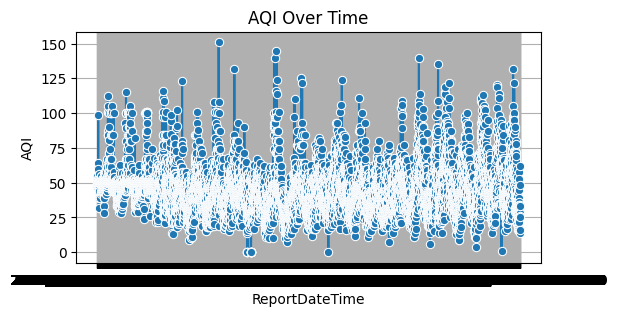

In [ ]:
plt.figure(figsize=(6, 3))
sns.lineplot(data=aqi, x='ReportDateTime', y='AQI', marker='o')
plt.title('AQI Over Time')
plt.xlabel('ReportDateTime')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

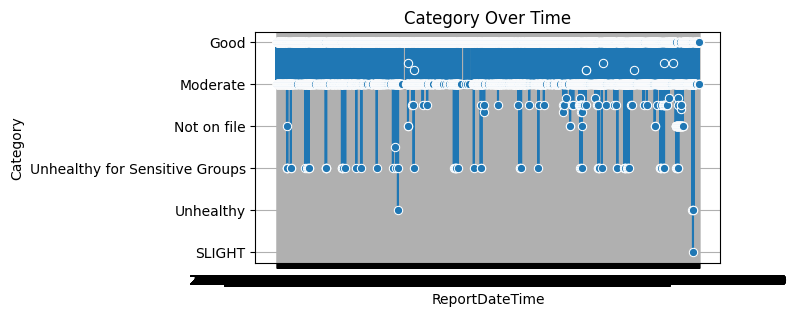

In [ ]:
plt.figure(figsize=(6, 3))
sns.lineplot(data=aqi, x='ReportDateTime', y='Category', marker='o')
plt.title('Category Over Time')
plt.xlabel('ReportDateTime')
plt.ylabel('Category')
plt.grid(True)
plt.show()

a. How many times has the AQI been recorded above 120?



In [ ]:
overage = aqi['AQI'] > 120
overage

,AQI
0,False
1,False
2,False
3,False
4,False
...,...
8915,False
8916,False
8917,False
8918,False


In [ ]:
overage.value_counts()

,count
AQI,
False,8906
True,14


## Answer (1a): The AQI was read above 120 a total of 14 times.

b. When did the Air Quality Index Category become unhealthy?

In [ ]:
aqi['Category'].nunique()

6

In [ ]:
aqi['Category'].value_counts()

,count
Category,
Good,5991
Moderate,2620
Not on file,228
Unhealthy for Sensitive Groups,76
Unhealthy,4
SLIGHT,1


In [ ]:
unhealthy_dates = aqi[aqi['Category'] == 'Unhealthy']
unhealthy_dates

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
2507,2508,151.0,Unhealthy,Ozone 8-hr,5.0,Grass,Juniper,2018/06/09 05:00:00+00
8778,8779,132.0,Unhealthy,Ozone 8-hr,5.0,Grass,Slight,2001/07/24 05:00:00+00
8786,8787,105.0,Unhealthy,PM2.5,8.0,Grass,Moderate,2001/07/12 05:00:00+00
8800,8801,122.0,Unhealthy,Ozone 8-hr,3.0,Grass,Slight,2001/06/21 05:00:00+00


## Answer (1b): The air quality reached an unhealthy range on 4 separate days: June 21st, July 12th and 24th of 2001 and June 09th of 2018.

# Question 2:
Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

In [ ]:
aqi['PollenCount'].value_counts()

,count
PollenCount,
3.0,553
1.0,475
4.0,408
5.0,401
8.0,398
...,...
128.0,1
279.0,1
218.0,1


## Answer (2):  The pollen count that occured the most was 3.0.

# Question 3:
[Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?

In [ ]:
aqi['PollenCount'].value_counts().head(15).sum()

np.int64(4461)

## Answer (3):  Given the fact that over 96% of the the days surveyed were good or moderate as far as the air quality and that almost half of the days surveyed had a pollen value on the charts means to me that Nashville should be a pretty comfortable place to live - assuming you do not have pollen allergies!

# Question 4:
[A vectorization problem]. Compare the manual approach versus a vectorized approach to find the mean AQI for each Air Quality Category ('Category' in the table).  For the vectorized method, you can use groupby() and mean() method in pandas datatype (ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a regular for-loop can be used. Calculate the time difference between the two approaches and evaluate.

In [ ]:
%%time #vectorized
aqi.groupby('Category')['AQI'].mean()

CPU times: user 3.96 ms, sys: 0 ns, total: 3.96 ms
Wall time: 10.5 ms


,AQI
Category,
Good,36.966283
Moderate,62.240840
Not on file,NaN
SLIGHT,60.000000
Unhealthy,127.500000
Unhealthy for Sensitive Groups,110.078947


In [ ]:
%%time
aqi['Category'].value_counts()

CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 3.35 ms


,count
Category,
Good,5991
Moderate,2620
Not on file,228
Unhealthy for Sensitive Groups,76
Unhealthy,4
SLIGHT,1


In [ ]:
%%time
sum1 = 0
sum2 = 0
sum3 = 0
sum4 = 0
sum5 = 0


for i,j in zip(aqi['Category'], aqi['AQI']):
    if i == 'Good':
        sum1 = sum1 + j
    elif i == 'Moderate':
        sum2 = sum2 + j
    elif i == 'Unhealthy for Sensitive Groups':
       sum3 = sum3 + j
    elif i == 'Unhealthy':
       sum4 = sum4 + j
    elif i == 'SLIGHT':
        sum5 = sum5 + j

# Handle potential division by zero if a category has no entries
mean1 = sum1 / aqi['Category'].value_counts()['Good'] if 'Good' in aqi['Category'].value_counts() and aqi['Category'].value_counts()['Good'] > 0 else 0
mean2 = sum2 / aqi['Category'].value_counts()['Moderate'] if 'Moderate' in aqi['Category'].value_counts() and aqi['Category'].value_counts()['Moderate'] > 0 else 0
mean3 = sum3 / aqi['Category'].value_counts()['Unhealthy for Sensitive Groups'] if 'Unhealthy for Sensitive Groups' in aqi['Category'].value_counts() and aqi['Category'].value_counts()['Unhealthy for Sensitive Groups'] > 0 else 0
mean4 = sum4 / aqi['Category'].value_counts()['Unhealthy'] if 'Unhealthy' in aqi['Category'].value_counts() and aqi['Category'].value_counts()['Unhealthy'] > 0 else 0
mean5 = sum5 / aqi['Category'].value_counts()['SLIGHT'] if 'SLIGHT' in aqi['Category'].value_counts() and aqi['Category'].value_counts()['SLIGHT'] > 0 else 0

print(mean1, mean2, mean3, mean4, mean5)

36.966282757469536 62.240839694656486 110.07894736842105 127.5 60.0
CPU times: user 19.1 ms, sys: 0 ns, total: 19.1 ms
Wall time: 18.9 ms


In [ ]:
time_diff = (19.1 + 2.91) - 3.96
time_diff

18.05